In [4]:
import pandas as pd

In [5]:
import os
root = '/data1/data_ETRI/p09/p093486'
file_name_list = os.listdir(root)

In [6]:
from matplotlib import pyplot as plt

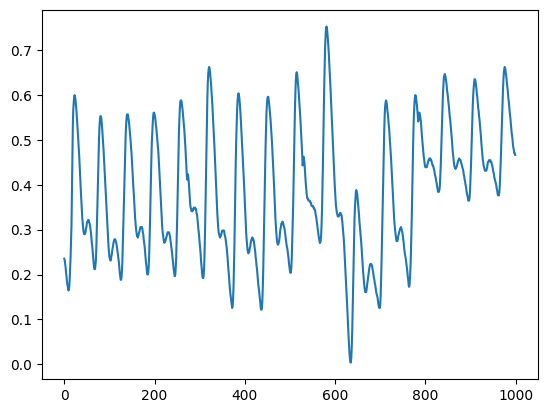

In [28]:
file_name = file_name_list[1]
col_names = ['time', 'ppg', 'pressure']
file_name = os.path.join(root, file_name)
df = pd.read_csv(file_name, names=col_names)
x = df.index.tolist()
ppg = df['ppg'].tolist()

plt.plot(x, ppg)

In [44]:
import os
import pandas as pd
import torch

# Min-Max 스케일링 함수 정의
def min_max_scale(tensor):
    min_value = tensor.min()
    max_value = tensor.max()
    scaled_tensor = (tensor - min_value) / (max_value - min_value)
    return scaled_tensor

# 불러올 열 이름
col_names = ['time', 'ppg', 'pressure']

# 모든 CSV 파일 불러오기
csv_files = [file for file in os.listdir(root) if file.endswith('.csv')]

# CSV 파일 처리
data_tensors = []
for file in csv_files:
    file_path = os.path.join(root, file)
    df = pd.read_csv(file_path, names=col_names)
    tensor = torch.tensor(df['ppg'].values, dtype=torch.float32)  # ppg 열을 텐서로 변환
    data_tensors.append(tensor)

data_norm = [min_max_scale(tensor) for tensor in data_tensors]
print(data_norm[0].max())

tensor(1.)


In [38]:
import pickle
import torch

with open('sample2.pkl', 'rb') as f:
    sample = pickle.load(f)
    
sample_norm = [min_max_scale(tensor) for tensor in sample]
print(type(sample_norm))

<class 'list'>


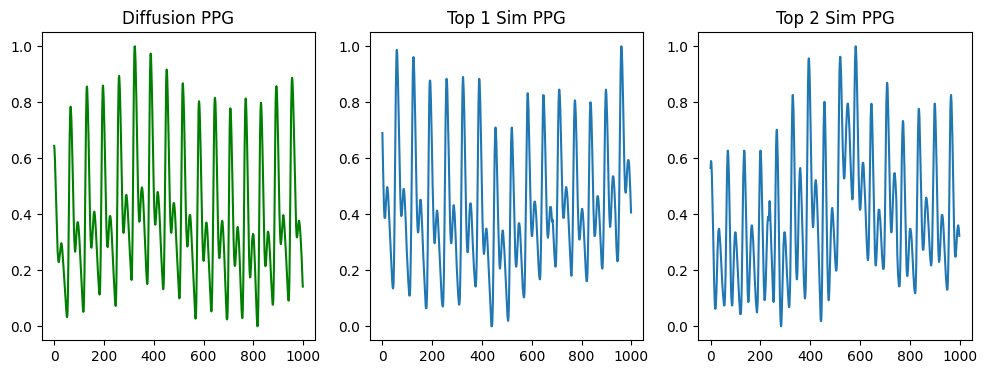

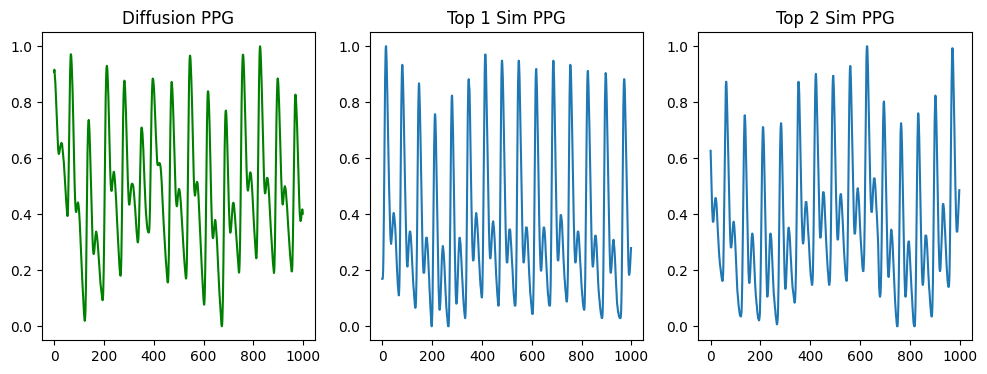

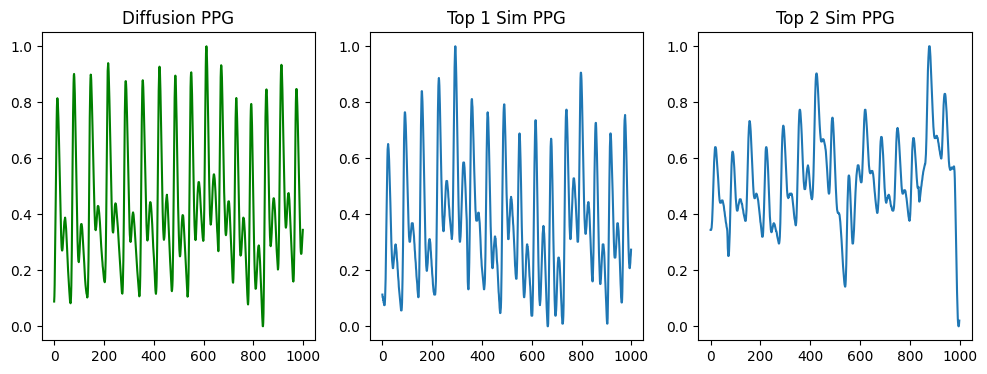

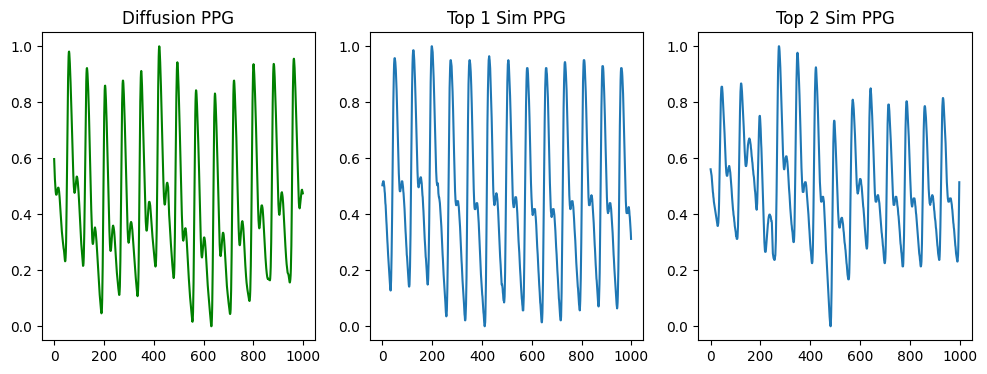

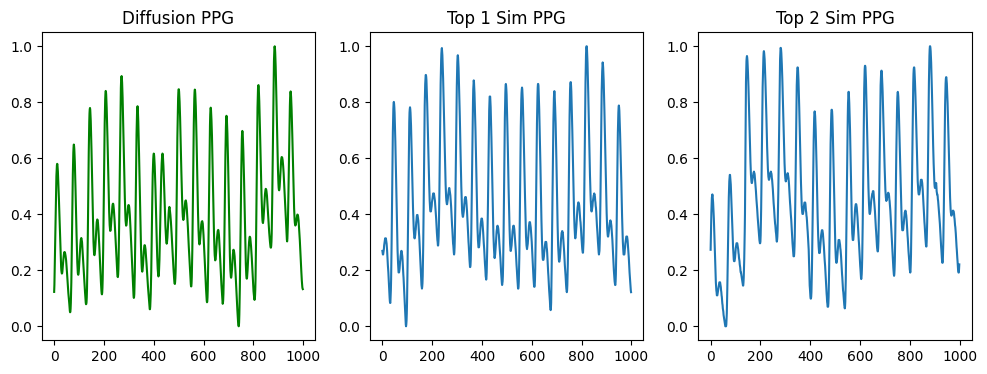

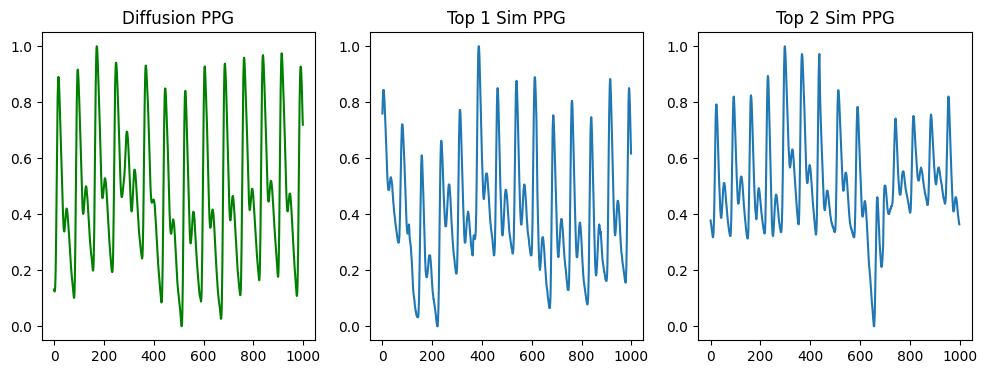

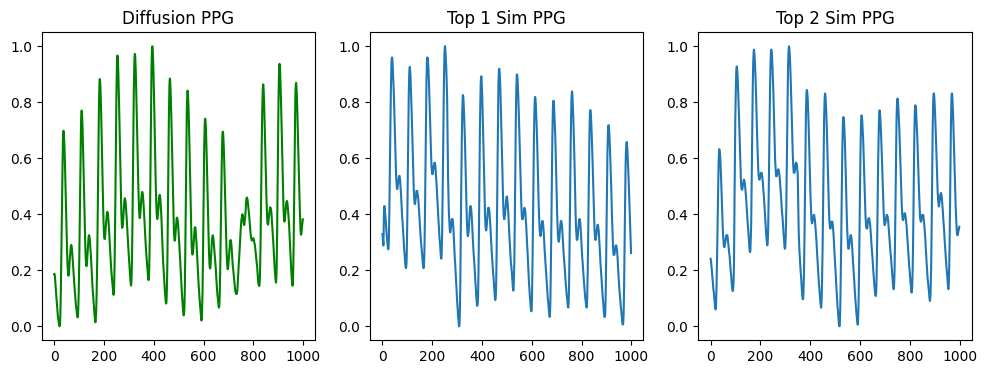

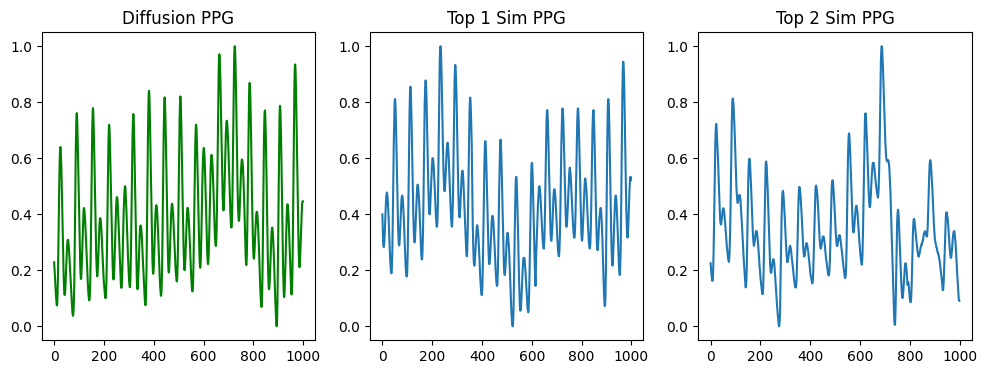

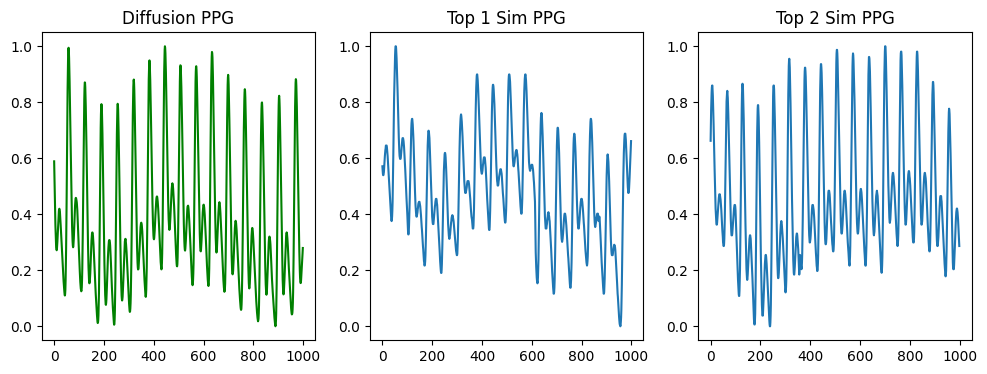

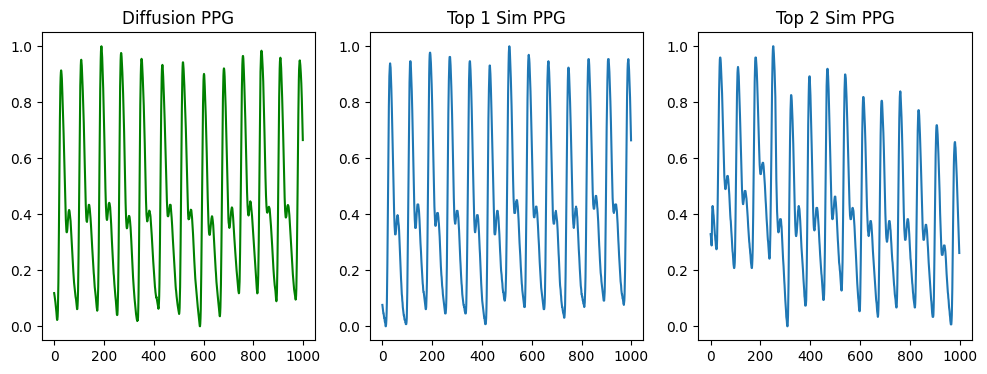

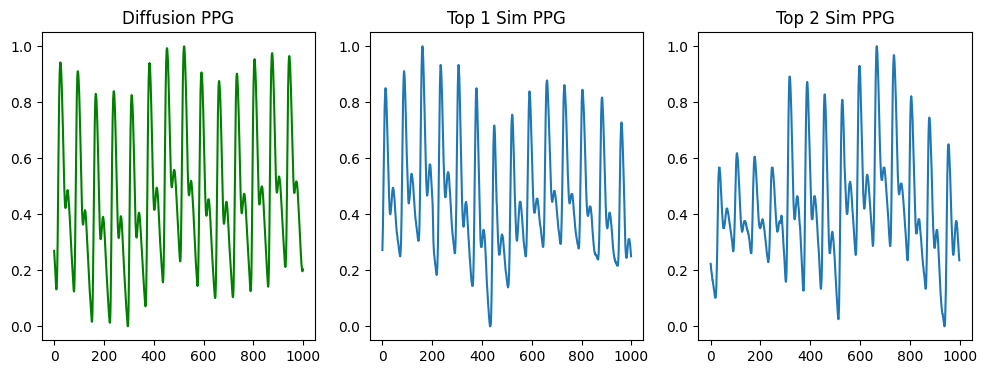

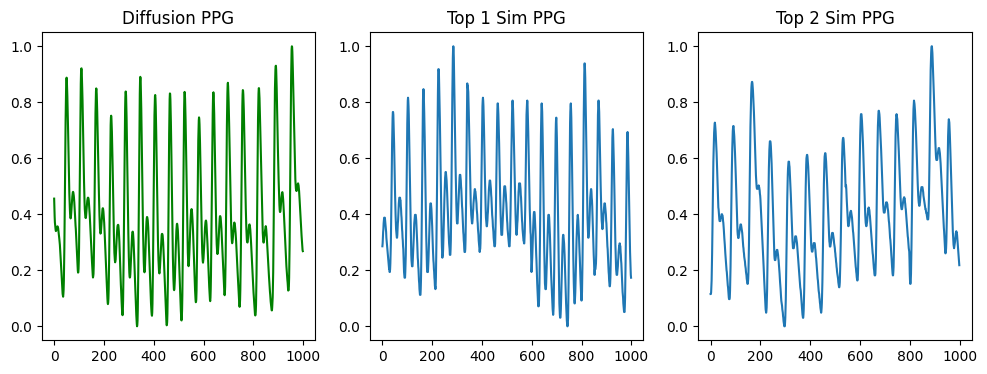

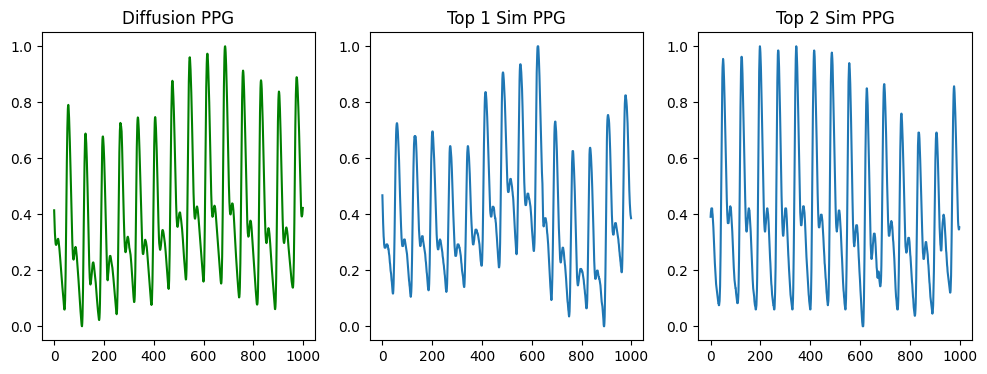

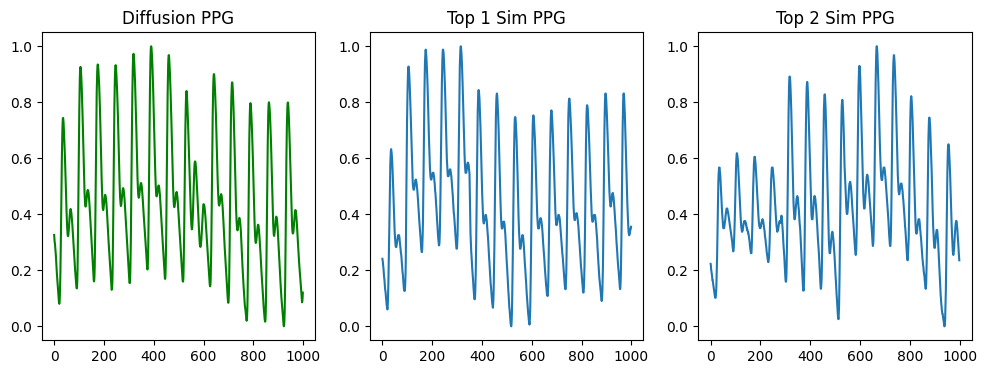

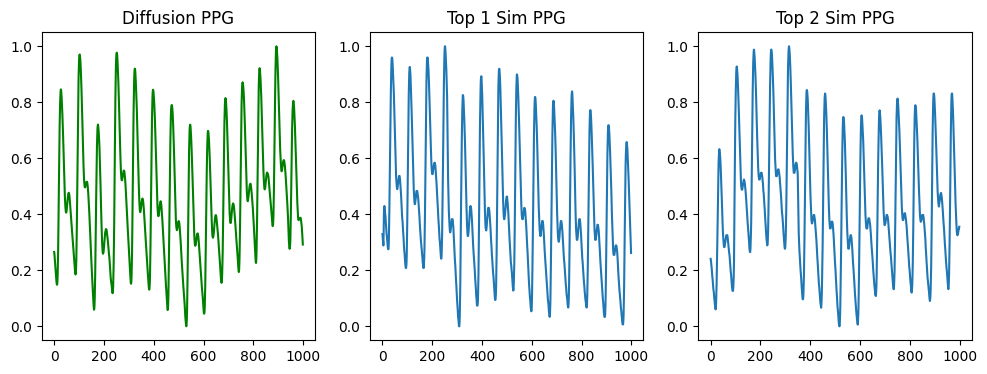

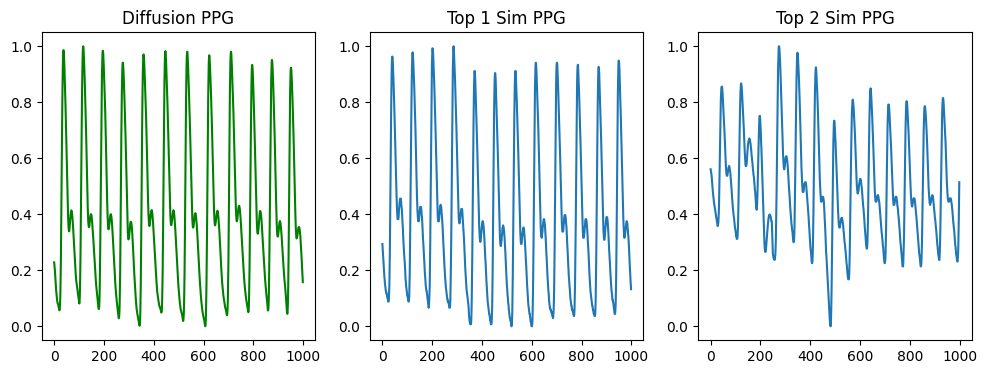

In [61]:
import numpy as np

# MSE 손실 계산 함수 정의
def mse_loss(tensor1, tensor2):
    squared_diff = (tensor1 - tensor2) ** 2
    loss = torch.mean(squared_diff)
    return loss.item()

# 각 sample_tensor에 대해 가장 작은 손실을 가지는 상위 k개의 data_tensor 추출
def get_top_k_data_tensors(sample_tensor, data_tensors, k):
    losses = []
    for data_tensor in data_tensors:
        loss = mse_loss(sample_tensor, data_tensor)
        losses.append(loss)
    
    top_indices = np.argsort(losses)[:k]
    top_data_tensors = [data_tensors[i] for i in top_indices]
    return top_data_tensors

# 각 sample_tensor에 대해 상위 3개의 가장 작은 손실을 가지는 data_tensor 추출
best_data_tensors = []
for sample_tensor in sample_norm:
    top_data_tensors = get_top_k_data_tensors(sample_tensor, data_norm, 2)
    # 시각화
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    # sample_tensor 시각화
    axes[0].plot(sample_tensor.squeeze().numpy(), color='green')
    axes[0].set_title('Diffusion PPG')
    
    # top_data_tensors 시각화
    for i, data_tensor in enumerate(top_data_tensors):
        axes[i+1].plot(data_tensor.numpy())
        axes[i+1].set_title(f'Top {i+1} Sim PPG')
    
    plt.show()

# 결과 확인
# print(len(best_data_tensors))
# for tensor in best_data_tensors:
#     print(tensor.shape)
#     print(tensor)
    # 추가 작업 수행
